In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing dataset
    1.Since data is in form of csv file we have to use pandas read_csv to load the data
    2.After loading it is important to check null values in a column or a row
    3.If it is present then following can be done,
        a.Filling NaN values with mean, median and mode using fillna() method
        b.If Less missing values, we can drop it as well


In [194]:
train_data=pd.read_csv('train_wn75k28.csv', index_col='id')
test_data=pd.read_csv('test_Wf7sxXF.csv', index_col='id')

In [197]:
train_data.head(15)
test_data.head(5)

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
id,,,,,,,,,,,,,,,,,
39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [198]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39161 entries, 1 to 39161
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            39161 non-null  object 
 1   campaign_var_1        39161 non-null  int64  
 2   campaign_var_2        39161 non-null  int64  
 3   products_purchased    18250 non-null  float64
 4   signup_date           24048 non-null  object 
 5   user_activity_var_1   39161 non-null  int64  
 6   user_activity_var_2   39161 non-null  int64  
 7   user_activity_var_3   39161 non-null  int64  
 8   user_activity_var_4   39161 non-null  int64  
 9   user_activity_var_5   39161 non-null  int64  
 10  user_activity_var_6   39161 non-null  int64  
 11  user_activity_var_7   39161 non-null  int64  
 12  user_activity_var_8   39161 non-null  int64  
 13  user_activity_var_9   39161 non-null  int64  
 14  user_activity_var_10  39161 non-null  int64  
 15  user_activity_var_1

In [199]:
train_data.isnull().sum()

created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [201]:
test_data.isnull().sum()

created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

In [204]:
train_data['products_purchased'] = train_data['products_purchased'].fillna(0) #Set product_purchased to zero 
train_data['signup_date'] = train_data['signup_date'].fillna(train_data['created_at']) #Set signup_date to created_at 
#train_data.drop(['signup_date','created_at' ],inplace = True, axis = 1) #delete signup_date coloumn
train_data.head(15)

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,,,,,,,,,,,,,,,,,,
1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2021-01-01,4,6,0.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
6,2021-01-01,3,4,3.0,2019-07-02,0,0,0,0,0,1,0,0,0,0,0,0,0
7,2021-01-01,5,1,1.0,2019-07-24,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2021-01-01,7,3,0.0,2020-12-12,0,0,0,0,0,1,0,0,0,0,1,0,0
9,2021-01-01,13,6,3.0,2018-06-21,0,0,0,0,1,0,0,0,0,0,0,0,0


In [202]:
test_data['products_purchased'] = test_data['products_purchased'].fillna(0) #Set product_purchased to zero 
test_data['signup_date'] = test_data['signup_date'].fillna(test_data['created_at']) #Set signup_date to created_at 
#train_data.drop(['signup_date','created_at' ],inplace = True, axis = 1) #delete signup_date coloumn
test_data.head(15)

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
id,,,,,,,,,,,,,,,,,
39162,2022-01-01,2,2,0.0,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
39164,2022-01-01,8,7,0.0,2022-01-01,0,0,0,0,1,1,0,0,0,0,0,0
39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0
39167,2022-01-01,13,5,0.0,2022-01-01,1,0,0,0,0,1,0,0,0,0,0,0
39168,2022-01-01,2,4,1.0,2021-09-08,1,0,0,0,0,0,0,0,0,0,0,0
39169,2022-01-01,1,8,0.0,2021-09-11,0,0,0,0,0,0,1,0,0,0,1,0
39170,2022-01-01,6,4,0.0,2022-01-01,1,0,0,0,0,0,0,0,0,0,0,0


In [205]:
train_data.isnull().sum()

created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

In [149]:
train_data.dtypes

created_at               object
campaign_var_1            int64
campaign_var_2            int64
products_purchased      float64
signup_date              object
user_activity_var_1       int64
user_activity_var_2       int64
user_activity_var_3       int64
user_activity_var_4       int64
user_activity_var_5       int64
user_activity_var_6       int64
user_activity_var_7       int64
user_activity_var_8       int64
user_activity_var_9       int64
user_activity_var_10      int64
user_activity_var_11      int64
user_activity_var_12      int64
buy                       int64
dtype: object

In [206]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])
    test_data[col]=pd.to_datetime(test_data[col])
    

In [207]:
    train_data.columns


Index(['created_at', 'campaign_var_1', 'campaign_var_2', 'products_purchased',
       'signup_date', 'user_activity_var_1', 'user_activity_var_2',
       'user_activity_var_3', 'user_activity_var_4', 'user_activity_var_5',
       'user_activity_var_6', 'user_activity_var_7', 'user_activity_var_8',
       'user_activity_var_9', 'user_activity_var_10', 'user_activity_var_11',
       'user_activity_var_12', 'buy'],
      dtype='object')

In [208]:
for i in ['created_at','signup_date']:
    change_into_datetime(i)

In [209]:
train_data.dtypes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39161 entries, 1 to 39161
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   created_at            39161 non-null  datetime64[ns]
 1   campaign_var_1        39161 non-null  int64         
 2   campaign_var_2        39161 non-null  int64         
 3   products_purchased    39161 non-null  float64       
 4   signup_date           39161 non-null  datetime64[ns]
 5   user_activity_var_1   39161 non-null  int64         
 6   user_activity_var_2   39161 non-null  int64         
 7   user_activity_var_3   39161 non-null  int64         
 8   user_activity_var_4   39161 non-null  int64         
 9   user_activity_var_5   39161 non-null  int64         
 10  user_activity_var_6   39161 non-null  int64         
 11  user_activity_var_7   39161 non-null  int64         
 12  user_activity_var_8   39161 non-null  int64         
 13  user_activity_va

In [210]:
train_data['signup_date'].dt.month

id
1         9
2         9
3         8
4        10
5         6
         ..
39157    10
39158    12
39159    12
39160    12
39161     8
Name: signup_date, Length: 39161, dtype: int64

In [211]:
train_data['lead_time_diff'] =  train_data['created_at'] - train_data['signup_date']
train_data['lead_time_diff'] = train_data['lead_time_diff'].dt.days
train_data.head(3)

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,lead_time_diff
id,,,,,,,,,,,,,,,,,,,
1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0,99
2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0,104
3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0,-222


In [212]:
test_data['lead_time_diff'] =  test_data['created_at'] - test_data['signup_date']
test_data['lead_time_diff'] = test_data['lead_time_diff'].dt.days
test_data.head(3)

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,lead_time_diff
id,,,,,,,,,,,,,,,,,,
39162,2022-01-01,2,2,0.0,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0,137
39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0,590
39164,2022-01-01,8,7,0.0,2022-01-01,0,0,0,0,1,1,0,0,0,0,0,0,0


In [213]:
train_data.drop(['created_at','signup_date'],axis=1 ,inplace=True)
test_data.drop(['created_at','signup_date'],axis=1 ,inplace=True)

In [214]:
train_data.head(3)


,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,lead_time_diff
id,,,,,,,,,,,,,,,,,
1,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,99
2,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,104
3,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,-222


In [215]:
train_data.dtypes

campaign_var_1            int64
campaign_var_2            int64
products_purchased      float64
user_activity_var_1       int64
user_activity_var_2       int64
user_activity_var_3       int64
user_activity_var_4       int64
user_activity_var_5       int64
user_activity_var_6       int64
user_activity_var_7       int64
user_activity_var_8       int64
user_activity_var_9       int64
user_activity_var_10      int64
user_activity_var_11      int64
user_activity_var_12      int64
buy                       int64
lead_time_diff            int64
dtype: object

In [216]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13184 entries, 39162 to 52345
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        13184 non-null  int64  
 1   campaign_var_2        13184 non-null  int64  
 2   products_purchased    13184 non-null  float64
 3   user_activity_var_1   13184 non-null  int64  
 4   user_activity_var_2   13184 non-null  int64  
 5   user_activity_var_3   13184 non-null  int64  
 6   user_activity_var_4   13184 non-null  int64  
 7   user_activity_var_5   13184 non-null  int64  
 8   user_activity_var_6   13184 non-null  int64  
 9   user_activity_var_7   13184 non-null  int64  
 10  user_activity_var_8   13184 non-null  int64  
 11  user_activity_var_9   13184 non-null  int64  
 12  user_activity_var_10  13184 non-null  int64  
 13  user_activity_var_11  13184 non-null  int64  
 14  user_activity_var_12  13184 non-null  int64  
 15  lead_time_diff 

#### EDA

In [217]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore') #ignore unnecessary warnings

In [218]:
train_data['products_purchased'].nunique()

5

<AxesSubplot:xlabel='products_purchased', ylabel='count'>

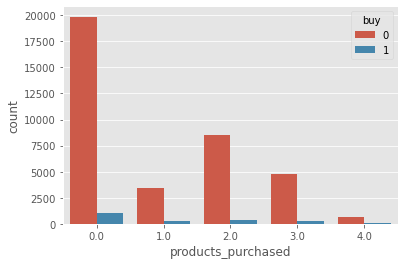

In [219]:
sns.countplot(x='products_purchased',hue='buy',data=train_data)

In [220]:
train_data[['campaign_var_1', 'campaign_var_2', 'products_purchased','lead_time_diff','buy']].corr() #Campagin vs Buy

,campaign_var_1,campaign_var_2,products_purchased,lead_time_diff,buy
campaign_var_1,1.000000,0.561489,-0.114655,-0.004374,-0.087202
campaign_var_2,0.561489,1.000000,-0.072100,-0.027836,-0.080064
products_purchased,-0.114655,-0.072100,1.000000,0.253905,0.005830
lead_time_diff,-0.004374,-0.027836,0.253905,1.000000,0.164817
buy,-0.087202,-0.080064,0.005830,0.164817,1.000000


<AxesSubplot:>

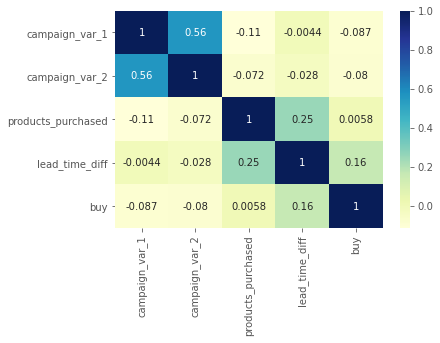

In [162]:
sns.heatmap(train_data[['campaign_var_1', 'campaign_var_2', 'products_purchased','lead_time_diff','buy']].corr(), cmap="YlGnBu", annot=True)

In [163]:
train_data[['user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'buy']].corr()  #User Activity vs Buy

,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
user_activity_var_1,1.000000,0.014599,-0.025950,0.016656,-0.015441,-0.190784,-0.085343,-0.047157,0.034783,0.012811,-0.062915,0.002535,0.044811
user_activity_var_2,0.014599,1.000000,-0.001075,0.132108,0.060982,-0.005297,-0.020153,-0.035306,0.155794,0.046324,0.085794,0.024440,0.354627
user_activity_var_3,-0.025950,-0.001075,1.000000,0.003023,0.023117,-0.050132,-0.006306,-0.025562,0.003898,0.019152,-0.027212,0.013261,0.005174
user_activity_var_4,0.016656,0.132108,0.003023,1.000000,0.071339,-0.021669,-0.004572,-0.039370,0.204941,0.046924,0.067085,0.037937,0.394706
user_activity_var_5,-0.015441,0.060982,0.023117,0.071339,1.000000,-0.078928,-0.007705,-0.031585,0.074189,0.028037,0.021225,0.022972,0.164972
user_activity_var_6,-0.190784,-0.005297,-0.050132,-0.021669,-0.078928,1.000000,-0.169651,-0.062460,-0.013304,0.001175,-0.076816,0.001938,-0.010951
user_activity_var_7,-0.085343,-0.020153,-0.006306,-0.004572,-0.007705,-0.169651,1.000000,-0.035982,-0.010222,0.002007,-0.063410,0.006371,-0.028428
user_activity_var_8,-0.047157,-0.035306,-0.025562,-0.039370,-0.031585,-0.062460,-0.035982,1.000000,-0.042465,-0.008993,-0.035003,-0.002377,-0.097355
user_activity_var_9,0.034783,0.155794,0.003898,0.204941,0.074189,-0.013304,-0.010222,-0.042465,1.000000,0.046980,0.120698,0.027851,0.463947
user_activity_var_10,0.012811,0.046324,0.019152,0.046924,0.028037,0.001175,0.002007,-0.008993,0.046980,1.000000,0.017285,-0.000464,0.084423


<AxesSubplot:>

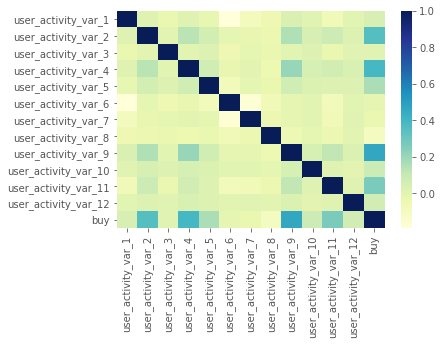

In [164]:
sns.heatmap(train_data[['user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'buy']].corr(), cmap="YlGnBu", annot=False) #User Activity vs Buy

<AxesSubplot:>

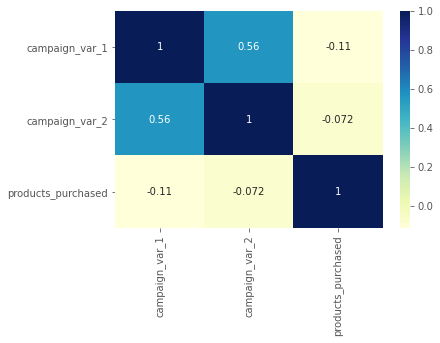

In [165]:
sns.heatmap(train_data[['campaign_var_1', 'campaign_var_2', 'products_purchased']].corr(), cmap="YlGnBu", annot=True)

### Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    
### Why to apply Feature Selection?
    To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features

### I wanted to find mutual information scores or matrix to get to know about the relationship between all features.

####  Feature Selection using Information Gain,

In [221]:
from sklearn.preprocessing import StandardScaler

In [222]:
scaler = StandardScaler()


In [223]:
scaler.fit(train_data.drop('buy', axis = 1))
scaled_train = scaler.transform(train_data.drop('buy', axis = 1))

In [225]:
scaler.fit(test_data)
scaled_test = scaler.transform(test_data)

In [229]:
df_train = pd.DataFrame(scaled_train,columns=train_data.columns[:-1])
df_train.rename(columns={'buy': 'lead_time_diff'}, inplace=True) #name mismached corrected due to code above
df_train.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,lead_time_diff
0,-1.590548,-1.703251,0.830647,-0.785745,-0.082227,-0.338553,-0.107696,-0.42122,-0.895506,1.565209,2.174352,-0.107575,-0.019575,-0.507352,-0.023709,-0.258038
1,-1.302604,-2.085768,0.830647,1.178167,-0.082227,2.953745,-0.107696,-0.42122,-0.895506,1.565209,-0.459418,-0.107575,-0.019575,-0.507352,-0.023709,-0.243102
2,0.713003,-1.320734,1.664531,1.178167,-0.082227,-0.338553,-0.107696,-0.42122,-0.895506,-0.628840,-0.459418,-0.107575,-0.019575,-0.507352,-0.023709,-1.216946
3,-0.150828,0.209334,0.830647,-0.785745,-0.082227,-0.338553,-0.107696,-0.42122,-0.895506,-0.628840,-0.459418,-0.107575,-0.019575,-0.507352,-0.023709,2.986117
4,-0.726716,-0.173183,-0.837120,-0.785745,-0.082227,-0.338553,-0.107696,-0.42122,-0.895506,1.565209,-0.459418,-0.107575,-0.019575,1.809936,-0.023709,0.064585


In [230]:
df_test = pd.DataFrame(scaled_test,columns=test_data.columns)
df_test.head(3)

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,lead_time_diff
0,-1.590191,-2.211315,-0.712089,1.212970,15.311060,-0.339424,-0.084741,-0.424376,0.839572,-0.657621,-0.407688,-0.091319,-0.015086,1.613611,-0.015086,-0.14501
1,-1.034611,-0.351009,1.933462,1.212970,-0.065312,-0.339424,-0.084741,-0.424376,-0.929756,-0.657621,2.449815,-0.091319,-0.015086,-0.547706,-0.015086,1.38117
2,0.076548,-0.351009,-0.712089,-0.764744,-0.065312,-0.339424,-0.084741,2.348158,0.839572,-0.657621,-0.407688,-0.091319,-0.015086,-0.547706,-0.015086,-0.60657


#### Model Selection

In [232]:
X_train = df_train
y_train = train_data['buy']
X_test = df_test

In [241]:
#fnc for checking various model at once
from sklearn import metrics
##dump model using pickle so that we will re-use
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))

    y_prediction=model.predict(X_test)
    sol = pd.DataFrame({'buy': y_prediction})
    sol.to_csv('sol.csv')
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    """
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('model.pkl','wb')
        pickle.dump(model,file)
    """

In [234]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
predict(RandomForestClassifier(),1)

Training score : 0.9997446439059268
predictions are: 
 [1 0 0 ... 0 0 0]




#### play with multiple Algorithms

In [236]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [237]:
predict(DecisionTreeClassifier(),0)

Training score : 0.9997957151247414
predictions are: 
 [1 0 0 ... 0 0 0]




In [238]:
predict(LogisticRegression(),0)

Training score : 0.974030285232757
predictions are: 
 [1 0 0 ... 0 0 0]


